In [1260]:
import numpy as np
import pandas as pd
import xgboost as xgb
import pickle
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

In [1261]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

In [1262]:
col_labels = ["age", "workclass","fnlwgt", "education","education_num","marital_status","occupation","relationship", "race", "sex", "capital_gain",
"capital_loss", "hours_per_week", "native_country", "wage_class"]

In [1263]:
train_set.columns = col_labels
test_set.columns = col_labels

In [1264]:
train_set.shape,test_set.shape

((32561, 15), (16281, 15))

In [1176]:
train_set
# we need to convert categorical columns to numerical data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [1177]:
train_set.isnull().any()
#there exist no null values 

age               False
workclass         False
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation        False
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country    False
wage_class        False
dtype: bool

In [1178]:
train_set.describe() 
#there is no missing data

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [1179]:
train_set['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [1180]:
train_set['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [1181]:
train_set['sex'] = train_set['sex'].map({' Male': 1, " Female": 0})

In [1182]:
train_set['sex']

0        1
1        1
2        1
3        1
4        0
        ..
32556    0
32557    1
32558    0
32559    1
32560    0
Name: sex, Length: 32561, dtype: int64

<AxesSubplot:>

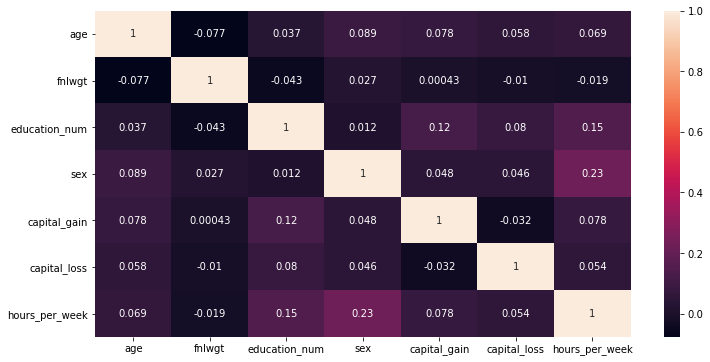

In [1183]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
corr_val=train_set.corr()
sns.heatmap(data=corr_val,annot=True)

In [1184]:
train_set['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [1185]:
race_map = train_set["race"].value_counts().to_dict()
train_set["race"] = train_set["race"].map(race_map)

In [1186]:
train_set.shape

(32561, 15)

In [1187]:
train_set['native_country'] = train_set['native_country'].replace(' ?',' Others')
train_set['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Others',
       ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England',
       ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy',
       ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [1188]:
country_map = train_set['native_country'].value_counts().to_dict()
train_set["native_country"] = train_set["native_country"].map(country_map)

In [1189]:
relation_map = train_set['relationship'].value_counts().to_dict()
train_set["relationship"] = train_set["relationship"].map(relation_map)

In [1190]:
train_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,8305,27816,1,2174,0,40,29170,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,13193,27816,1,0,0,13,29170,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,8305,27816,1,0,0,40,29170,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,13193,3124,1,0,0,40,29170,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,1568,3124,0,0,0,40,95,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,1568,27816,0,0,0,38,29170,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,13193,27816,1,0,0,40,29170,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,3446,27816,0,0,0,40,29170,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,5068,27816,1,0,0,20,29170,<=50K


In [1191]:
train_set['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [1192]:
train_set['workclass'] = train_set['workclass'].replace(' ?',' Others')
train_set['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 Others               1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [1193]:
train_set['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [1194]:
train_set['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [1195]:
train_set[['education','education_num']].value_counts()

education      education_num
 HS-grad       9                10501
 Some-college  10                7291
 Bachelors     13                5355
 Masters       14                1723
 Assoc-voc     11                1382
 11th          7                 1175
 Assoc-acdm    12                1067
 10th          6                  933
 7th-8th       4                  646
 Prof-school   15                 576
 9th           5                  514
 12th          8                  433
 Doctorate     16                 413
 5th-6th       3                  333
 1st-4th       2                  168
 Preschool     1                   51
dtype: int64

In [1196]:
# since education_num represents education column we can drop education column.
train_set = train_set.drop('education', axis = 1)

In [1197]:
train_set['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Others', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [1198]:
train_set['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [1199]:
train_set['occupation'] = train_set['occupation'].replace(' ?',' Others')
train_set['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Others', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [1200]:
occupation_map = train_set['occupation'].value_counts().to_dict()
train_set['occupation'] = train_set['occupation'].map(occupation_map)

In [1201]:
train_set

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,13,Never-married,3770,8305,27816,1,2174,0,40,29170,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,4066,13193,27816,1,0,0,13,29170,<=50K
2,38,Private,215646,9,Divorced,1370,8305,27816,1,0,0,40,29170,<=50K
3,53,Private,234721,7,Married-civ-spouse,1370,13193,3124,1,0,0,40,29170,<=50K
4,28,Private,338409,13,Married-civ-spouse,4140,1568,3124,0,0,0,40,95,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,928,1568,27816,0,0,0,38,29170,<=50K
32557,40,Private,154374,9,Married-civ-spouse,2002,13193,27816,1,0,0,40,29170,>50K
32558,58,Private,151910,9,Widowed,3770,3446,27816,0,0,0,40,29170,<=50K
32559,22,Private,201490,9,Never-married,3770,5068,27816,1,0,0,20,29170,<=50K


In [1202]:
train_set['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 Others               1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [1203]:
ordinal_labels = train_set.groupby(['workclass'])['education_num'].mean().sort_values().index
ordinal_labels 

Index([' Never-worked', ' Without-pay', ' Others', ' Private',
       ' Self-emp-not-inc', ' Federal-gov', ' Local-gov', ' Self-emp-inc',
       ' State-gov'],
      dtype='object', name='workclass')

In [1204]:
enumerate(ordinal_labels, 0) 

In [1205]:
ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels, 0)}
ordinal_labels2

{' Never-worked': 0,
 ' Without-pay': 1,
 ' Others': 2,
 ' Private': 3,
 ' Self-emp-not-inc': 4,
 ' Federal-gov': 5,
 ' Local-gov': 6,
 ' Self-emp-inc': 7,
 ' State-gov': 8}

In [1206]:
train_set['worklcass_num'] = train_set['workclass'].map(ordinal_labels2)

In [1207]:
train_set = train_set.drop('workclass', axis = 1)
train_set

,age,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,worklcass_num
0,39,77516,13,Never-married,3770,8305,27816,1,2174,0,40,29170,<=50K,8
1,50,83311,13,Married-civ-spouse,4066,13193,27816,1,0,0,13,29170,<=50K,4
2,38,215646,9,Divorced,1370,8305,27816,1,0,0,40,29170,<=50K,3
3,53,234721,7,Married-civ-spouse,1370,13193,3124,1,0,0,40,29170,<=50K,3
4,28,338409,13,Married-civ-spouse,4140,1568,3124,0,0,0,40,95,<=50K,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,Married-civ-spouse,928,1568,27816,0,0,0,38,29170,<=50K,3
32557,40,154374,9,Married-civ-spouse,2002,13193,27816,1,0,0,40,29170,>50K,3
32558,58,151910,9,Widowed,3770,3446,27816,0,0,0,40,29170,<=50K,3
32559,22,201490,9,Never-married,3770,5068,27816,1,0,0,20,29170,<=50K,3


In [1208]:
label = train_set.groupby(['marital_status'])['education_num'].mean().sort_values().index
label

Index([' Widowed', ' Separated', ' Married-spouse-absent', ' Never-married',
       ' Divorced', ' Married-AF-spouse', ' Married-civ-spouse'],
      dtype='object', name='marital_status')

In [1209]:
labels2 = {k:i for i,k in enumerate(label, 0)}
labels2

{' Widowed': 0,
 ' Separated': 1,
 ' Married-spouse-absent': 2,
 ' Never-married': 3,
 ' Divorced': 4,
 ' Married-AF-spouse': 5,
 ' Married-civ-spouse': 6}

In [1210]:
train_set['marital_status_num'] = train_set['marital_status'].map(labels2)
train_set

,age,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,worklcass_num,marital_status_num
0,39,77516,13,Never-married,3770,8305,27816,1,2174,0,40,29170,<=50K,8,3
1,50,83311,13,Married-civ-spouse,4066,13193,27816,1,0,0,13,29170,<=50K,4,6
2,38,215646,9,Divorced,1370,8305,27816,1,0,0,40,29170,<=50K,3,4
3,53,234721,7,Married-civ-spouse,1370,13193,3124,1,0,0,40,29170,<=50K,3,6
4,28,338409,13,Married-civ-spouse,4140,1568,3124,0,0,0,40,95,<=50K,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,Married-civ-spouse,928,1568,27816,0,0,0,38,29170,<=50K,3,6
32557,40,154374,9,Married-civ-spouse,2002,13193,27816,1,0,0,40,29170,>50K,3,6
32558,58,151910,9,Widowed,3770,3446,27816,0,0,0,40,29170,<=50K,3,0
32559,22,201490,9,Never-married,3770,5068,27816,1,0,0,20,29170,<=50K,3,3


In [1211]:
train_set = train_set.drop('marital_status',axis = 1)
train_set

,age,fnlwgt,education_num,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,worklcass_num,marital_status_num
0,39,77516,13,3770,8305,27816,1,2174,0,40,29170,<=50K,8,3
1,50,83311,13,4066,13193,27816,1,0,0,13,29170,<=50K,4,6
2,38,215646,9,1370,8305,27816,1,0,0,40,29170,<=50K,3,4
3,53,234721,7,1370,13193,3124,1,0,0,40,29170,<=50K,3,6
4,28,338409,13,4140,1568,3124,0,0,0,40,95,<=50K,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,928,1568,27816,0,0,0,38,29170,<=50K,3,6
32557,40,154374,9,2002,13193,27816,1,0,0,40,29170,>50K,3,6
32558,58,151910,9,3770,3446,27816,0,0,0,40,29170,<=50K,3,0
32559,22,201490,9,3770,5068,27816,1,0,0,20,29170,<=50K,3,3


In [1212]:
train_y = train_set['wage_class']
x = train_set.drop('wage_class', axis = 1)
y = train_y

In [1213]:
y.unique()

array([' <=50K', ' >50K'], dtype=object)

In [1214]:
y = y.map({' >50K': 1, ' <=50K': 0})
y 

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: wage_class, Length: 32561, dtype: int64

In [1215]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)

/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [1217]:
train_y = y,train_x = scaled_data

In [1219]:
train_x

array([[ 0.03067056, -1.06361075,  1.13473876, ...,  0.34093885,
         3.09808689, -0.79733378],
       [ 0.83710898, -1.008707  ,  1.13473876, ...,  0.34093885,
         0.27627908,  0.97400931],
       [-0.04264203,  0.2450785 , -0.42005962, ...,  0.34093885,
        -0.42917287, -0.20688608],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, ...,  0.34093885,
        -0.42917287, -2.56867687],
       [-1.21564337,  0.11095988, -0.42005962, ...,  0.34093885,
        -0.42917287, -0.79733378],
       [ 0.98373415,  0.92989258, -0.42005962, ...,  0.34093885,
         2.39263494,  0.97400931]])

In [1220]:
# fit model no training data
model = XGBClassifier(objective='binary:logistic')
model.fit(train_x, train_y)

/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:24:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=4, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

In [1221]:
# cheking training accuracy
y_pred = model.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(train_y,predictions)
accuracy

0.9024599981573047

In [1222]:
test_set.describe()
#we do not have missing values 

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [1265]:
test_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [1266]:
test_set['workclass'].unique()
test_set['workclass'] = test_set['workclass'].replace(' ?', ' Others')
test_set['workclass'].unique()    

array([' Private', ' Local-gov', ' Others', ' Self-emp-not-inc',
       ' Federal-gov', ' State-gov', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [1267]:
test_set['occupation'] = test_set['occupation'].replace(' ?', ' Others')
test_set['occupation'].unique()      

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv',
       ' Others', ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'], dtype=object)

In [1268]:
test_set['native_country'].unique()
test_set['native_country'] = test_set['native_country'].replace(' ?', ' Others')
test_set['native_country'].unique()

array([' United-States', ' Others', ' Peru', ' Guatemala', ' Mexico',
       ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
       ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
       ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
       ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
       ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
       ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
       ' Hong', ' Greece', ' Trinadad&Tobago',
       ' Outlying-US(Guam-USVI-etc)', ' France'], dtype=object)

In [1269]:
test_set['race'].unique()

array([' Black', ' White', ' Asian-Pac-Islander', ' Other',
       ' Amer-Indian-Eskimo'], dtype=object)

In [1270]:
test_set['relationship'].unique()

array([' Own-child', ' Husband', ' Not-in-family', ' Unmarried', ' Wife',
       ' Other-relative'], dtype=object)

In [1271]:
test_set = test_set.drop('education',axis = 1)

In [1272]:
test_set

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,Others,103497,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,Others,321403,9,Widowed,Others,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [1273]:
test_set['sex'] = test_set['sex'].map({' Male': 1, " Female": 0})

In [1274]:
race_map = test_set['race'].value_counts().to_dict()
test_set['race'] =test_set['race'].map(race_map)

In [1275]:
test_set

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,1561,1,0,0,40,United-States,<=50K.
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,13946,1,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,13946,1,0,0,40,United-States,>50K.
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,1561,1,7688,0,40,United-States,>50K.
4,18,Others,103497,10,Never-married,Others,Own-child,13946,0,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,13,Divorced,Prof-specialty,Not-in-family,13946,0,0,0,36,United-States,<=50K.
16277,64,Others,321403,9,Widowed,Others,Other-relative,1561,1,0,0,40,United-States,<=50K.
16278,38,Private,374983,13,Married-civ-spouse,Prof-specialty,Husband,13946,1,0,0,50,United-States,<=50K.
16279,44,Private,83891,13,Divorced,Adm-clerical,Own-child,480,1,5455,0,40,United-States,<=50K.


In [1276]:
native = test_set['native_country'].value_counts().to_dict()
test_set['native_country'] = test_set['native_country'].map(native)

In [1277]:
relation_map = test_set['relationship'].value_counts().to_dict()
test_set["relationship"] = test_set["relationship"].map(relation_map)
test_set

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,7,Never-married,Machine-op-inspct,2513,1561,1,0,0,40,14662,<=50K.
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,6523,13946,1,0,0,50,14662,<=50K.
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,6523,13946,1,0,0,40,14662,>50K.
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,6523,1561,1,7688,0,40,14662,>50K.
4,18,Others,103497,10,Never-married,Others,2513,13946,0,0,0,30,14662,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,13,Divorced,Prof-specialty,4278,13946,0,0,0,36,14662,<=50K.
16277,64,Others,321403,9,Widowed,Others,525,1561,1,0,0,40,14662,<=50K.
16278,38,Private,374983,13,Married-civ-spouse,Prof-specialty,6523,13946,1,0,0,50,14662,<=50K.
16279,44,Private,83891,13,Divorced,Adm-clerical,2513,480,1,5455,0,40,14662,<=50K.


In [1278]:
occupation_map = test_set['occupation'].value_counts().to_dict()
test_set['occupation'] = test_set['occupation'].map(occupation_map)
test_set

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,7,Never-married,1020,2513,1561,1,0,0,40,14662,<=50K.
1,38,Private,89814,9,Married-civ-spouse,496,6523,13946,1,0,0,50,14662,<=50K.
2,28,Local-gov,336951,12,Married-civ-spouse,334,6523,13946,1,0,0,40,14662,>50K.
3,44,Private,160323,10,Married-civ-spouse,1020,6523,1561,1,7688,0,40,14662,>50K.
4,18,Others,103497,10,Never-married,966,2513,13946,0,0,0,30,14662,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,13,Divorced,2032,4278,13946,0,0,0,36,14662,<=50K.
16277,64,Others,321403,9,Widowed,966,525,1561,1,0,0,40,14662,<=50K.
16278,38,Private,374983,13,Married-civ-spouse,2032,6523,13946,1,0,0,50,14662,<=50K.
16279,44,Private,83891,13,Divorced,1841,2513,480,1,5455,0,40,14662,<=50K.


In [1279]:
label = test_set.groupby(['marital_status'])['education_num'].mean().sort_values().index
labels2 = {k:i for i,k in enumerate(label, 0)}

In [1280]:
test_set['marital_status_num'] = test_set['marital_status'].map(labels2)
test_set.drop('marital_status', axis = 1)

,age,workclass,fnlwgt,education_num,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,marital_status_num
0,25,Private,226802,7,1020,2513,1561,1,0,0,40,14662,<=50K.,3
1,38,Private,89814,9,496,6523,13946,1,0,0,50,14662,<=50K.,5
2,28,Local-gov,336951,12,334,6523,13946,1,0,0,40,14662,>50K.,5
3,44,Private,160323,10,1020,6523,1561,1,7688,0,40,14662,>50K.,5
4,18,Others,103497,10,966,2513,13946,0,0,0,30,14662,<=50K.,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,13,2032,4278,13946,0,0,0,36,14662,<=50K.,4
16277,64,Others,321403,9,966,525,1561,1,0,0,40,14662,<=50K.,0
16278,38,Private,374983,13,2032,6523,13946,1,0,0,50,14662,<=50K.,5
16279,44,Private,83891,13,1841,2513,480,1,5455,0,40,14662,<=50K.,4


In [1281]:
ordinal_labels = test_set.groupby(['workclass'])['education_num'].mean().sort_values().index
ordinal_labels 

Index([' Never-worked', ' Without-pay', ' Others', ' Private',
       ' Self-emp-not-inc', ' Federal-gov', ' Local-gov', ' Self-emp-inc',
       ' State-gov'],
      dtype='object', name='workclass')

In [1282]:
ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels, 0)}
ordinal_labels2

{' Never-worked': 0,
 ' Without-pay': 1,
 ' Others': 2,
 ' Private': 3,
 ' Self-emp-not-inc': 4,
 ' Federal-gov': 5,
 ' Local-gov': 6,
 ' Self-emp-inc': 7,
 ' State-gov': 8}

In [1283]:
test_set['worklcass_num'] = test_set['workclass'].map(ordinal_labels2)
test_set = test_set.drop('workclass',axis=1)
test_set

,age,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,marital_status_num,worklcass_num
0,25,226802,7,Never-married,1020,2513,1561,1,0,0,40,14662,<=50K.,3,3
1,38,89814,9,Married-civ-spouse,496,6523,13946,1,0,0,50,14662,<=50K.,5,3
2,28,336951,12,Married-civ-spouse,334,6523,13946,1,0,0,40,14662,>50K.,5,6
3,44,160323,10,Married-civ-spouse,1020,6523,1561,1,7688,0,40,14662,>50K.,5,3
4,18,103497,10,Never-married,966,2513,13946,0,0,0,30,14662,<=50K.,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,215419,13,Divorced,2032,4278,13946,0,0,0,36,14662,<=50K.,4,3
16277,64,321403,9,Widowed,966,525,1561,1,0,0,40,14662,<=50K.,0,2
16278,38,374983,13,Married-civ-spouse,2032,6523,13946,1,0,0,50,14662,<=50K.,5,3
16279,44,83891,13,Divorced,1841,2513,480,1,5455,0,40,14662,<=50K.,4,3


In [1284]:
label = test_set.groupby(['marital_status'])['education_num'].mean().sort_values().index
label

Index([' Widowed', ' Separated', ' Married-spouse-absent', ' Never-married',
       ' Divorced', ' Married-civ-spouse', ' Married-AF-spouse'],
      dtype='object', name='marital_status')

In [1285]:
labels2 = {k:i for i,k in enumerate(label, 0)}
labels2

{' Widowed': 0,
 ' Separated': 1,
 ' Married-spouse-absent': 2,
 ' Never-married': 3,
 ' Divorced': 4,
 ' Married-civ-spouse': 5,
 ' Married-AF-spouse': 6}

In [1286]:
test_set['marital_status_num'] = test_set['marital_status'].map(labels2)
test_set = test_set.drop('marital_status', axis = 1)
test_set

,age,fnlwgt,education_num,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,marital_status_num,worklcass_num
0,25,226802,7,1020,2513,1561,1,0,0,40,14662,<=50K.,3,3
1,38,89814,9,496,6523,13946,1,0,0,50,14662,<=50K.,5,3
2,28,336951,12,334,6523,13946,1,0,0,40,14662,>50K.,5,6
3,44,160323,10,1020,6523,1561,1,7688,0,40,14662,>50K.,5,3
4,18,103497,10,966,2513,13946,0,0,0,30,14662,<=50K.,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,215419,13,2032,4278,13946,0,0,0,36,14662,<=50K.,4,3
16277,64,321403,9,966,525,1561,1,0,0,40,14662,<=50K.,0,2
16278,38,374983,13,2032,6523,13946,1,0,0,50,14662,<=50K.,5,3
16279,44,83891,13,1841,2513,480,1,5455,0,40,14662,<=50K.,4,3


In [1287]:
test_set['wage_class'] = test_set['wage_class'].map({' >50K.': 1, ' <=50K.': 0})
test_set

,age,fnlwgt,education_num,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,marital_status_num,worklcass_num
0,25,226802,7,1020,2513,1561,1,0,0,40,14662,0,3,3
1,38,89814,9,496,6523,13946,1,0,0,50,14662,0,5,3
2,28,336951,12,334,6523,13946,1,0,0,40,14662,1,5,6
3,44,160323,10,1020,6523,1561,1,7688,0,40,14662,1,5,3
4,18,103497,10,966,2513,13946,0,0,0,30,14662,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,215419,13,2032,4278,13946,0,0,0,36,14662,0,4,3
16277,64,321403,9,966,525,1561,1,0,0,40,14662,0,0,2
16278,38,374983,13,2032,6523,13946,1,0,0,50,14662,0,5,3
16279,44,83891,13,1841,2513,480,1,5455,0,40,14662,0,4,3


In [1288]:
test_y = test_set['wage_class']
x1 = test_set.drop('wage_class', axis = 1)
x1

,age,fnlwgt,education_num,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,marital_status_num,worklcass_num
0,25,226802,7,1020,2513,1561,1,0,0,40,14662,3,3
1,38,89814,9,496,6523,13946,1,0,0,50,14662,5,3
2,28,336951,12,334,6523,13946,1,0,0,40,14662,5,6
3,44,160323,10,1020,6523,1561,1,7688,0,40,14662,5,3
4,18,103497,10,966,2513,13946,0,0,0,30,14662,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,215419,13,2032,4278,13946,0,0,0,36,14662,4,3
16277,64,321403,9,966,525,1561,1,0,0,40,14662,0,2
16278,38,374983,13,2032,6523,13946,1,0,0,50,14662,5,3
16279,44,83891,13,1841,2513,480,1,5455,0,40,14662,4,3


In [1289]:
test_y

0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: wage_class, Length: 16281, dtype: int64

In [1290]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data1=scaler.fit_transform(x1)

/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [1291]:
test_x = scaled_data1
test_x

array([[-0.99412926,  0.35347399, -1.19686359, ...,  0.3322844 ,
        -0.6867059 , -0.43324492],
       [-0.05541716, -0.94239062, -0.41788553, ...,  0.3322844 ,
         0.88322441, -0.43324492],
       [-0.77750339,  1.39544986,  0.75058156, ...,  0.3322844 ,
         0.88322441,  1.65384272],
       ...,
       [-0.05541716,  1.75522095,  1.14007059, ...,  0.3322844 ,
         0.88322441, -0.43324492],
       [ 0.37783458, -0.99842039,  1.14007059, ...,  0.3322844 ,
         0.09825926, -0.43324492],
       [-0.27204303, -0.0689392 ,  1.14007059, ...,  0.3322844 ,
         0.88322441,  2.3495386 ]])

In [1292]:
test_y

0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: wage_class, Length: 16281, dtype: int64

In [1293]:
# cheking initial test accuracy
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_y,predictions)
accuracy

0.8100239543025612

In [1297]:
# Now to increae the accuracy of the model, we'll do hyperparameter tuning using grid search
from sklearn.model_selection import GridSearchCV

In [1303]:
param_grid={
   
    'learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [1304]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [1305]:
grid.fit(train_x,train_y)

/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV] learning_rate=1, max_depth=3, n_estimators=10 ...................
[11:46:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=3, n_estimators=10, score=0.8536023585774829, total=   0.3s
[CV] learning_rate=1, max_depth=3, n_estimators=10 ...................
[11:46:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=3, n_estimators=10, score=0.8597751980836558, total=   0.1s
[CV] learning_rate=1, max_depth=3, n_estimators=10 ...................
[11:46:30] WARNING: ../src/learner.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  learning_rate=1, max_depth=3, n_estimators=10, score=0.8649221413434074, total=   0.2s
[CV] learning_rate=1, max_depth=3, n_estimators=50 ...................
[11:46:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=3, n_estimators=50, score=0.8640132669983416, total=   0.7s
[CV] learning_rate=1, max_depth=3, n_estimators=50 ...................
[11:46:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=3, n_estimators=50, score=0.8664086972544685, total=   0.7s
[CV] learning_rate=1, max_depth=3, n_estimators=50 ...................
[11:

[CV]  learning_rate=1, max_depth=5, n_estimators=200, score=0.8517597199189239, total=   2.2s
[CV] learning_rate=1, max_depth=5, n_estimators=200 ..................
[11:46:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=5, n_estimators=200, score=0.85146963973095, total=   3.0s
[CV] learning_rate=1, max_depth=10, n_estimators=10 ..................
[11:46:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=10, n_estimators=10, score=0.855352865303114, total=   0.7s
[CV] learning_rate=1, max_depth=10, n_estimators=10 ..................
[11:

[CV]  learning_rate=1, max_depth=20, n_estimators=100, score=0.8449419568822554, total=   4.5s
[CV] learning_rate=1, max_depth=20, n_estimators=100 .................
[11:47:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=20, n_estimators=100, score=0.8479823106688779, total=   4.9s
[CV] learning_rate=1, max_depth=20, n_estimators=100 .................
[11:47:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=20, n_estimators=100, score=0.8490739887588685, total=   4.4s
[CV] learning_rate=1, max_depth=20, n_estimators=200 ................

[CV]  learning_rate=0.5, max_depth=5, n_estimators=10, score=0.8726619367916705, total=   0.2s
[CV] learning_rate=0.5, max_depth=5, n_estimators=50 .................
[11:48:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50, score=0.863368343467846, total=   0.7s
[CV] learning_rate=0.5, max_depth=5, n_estimators=50 .................
[11:48:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50, score=0.8709231619679381, total=   0.7s
[CV] learning_rate=0.5, max_depth=5, n_estimators=50 .................

[CV]  learning_rate=0.5, max_depth=10, n_estimators=200, score=0.8527731711811314, total=   5.2s
[CV] learning_rate=0.5, max_depth=10, n_estimators=200 ...............
[11:49:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=10, n_estimators=200, score=0.8496268312908873, total=   5.7s
[CV] learning_rate=0.5, max_depth=20, n_estimators=10 ................
[11:49:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=20, n_estimators=10, score=0.8526810392482034, total=   4.1s
[CV] learning_rate=0.5, max_depth=20, n_estimators=10 ..........

[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, score=0.8618942325409987, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[11:50:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, score=0.8656716417910447, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[11:50:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, score=0.870911268773611, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, n_estimators=200 .............

[CV]  learning_rate=0.1, max_depth=10, n_estimators=10, score=0.8679627752695107, total=   0.3s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[11:50:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, score=0.8657637737239727, total=   1.5s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[11:50:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, score=0.8657637737239727, total=   1.5s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ............

[CV]  learning_rate=0.1, max_depth=20, n_estimators=200, score=0.8598673300165838, total=  10.8s
[CV] learning_rate=0.1, max_depth=20, n_estimators=200 ...............
[11:51:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=20, n_estimators=200, score=0.8613286648852851, total=  10.2s
[CV] learning_rate=0.01, max_depth=3, n_estimators=10 ................
[11:51:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=3, n_estimators=10, score=0.8386769854431546, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, n_estimators=10 ..........

[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, score=0.8483508384005897, total=   1.4s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100 ...............
[11:52:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, score=0.8533259627786991, total=   1.4s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100 ...............
[11:52:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, score=0.8580116096931724, total=   1.4s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200 ........

[CV]  learning_rate=0.01, max_depth=20, n_estimators=10, score=0.8469547590527965, total=   0.6s
[CV] learning_rate=0.01, max_depth=20, n_estimators=50 ...............
[11:52:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=20, n_estimators=50, score=0.8454026165468952, total=   2.7s
[CV] learning_rate=0.01, max_depth=20, n_estimators=50 ...............
[11:52:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=20, n_estimators=50, score=0.8482587064676617, total=   2.8s
[CV] learning_rate=0.01, max_depth=20, n_estimators=50 ........

[CV]  learning_rate=0.001, max_depth=3, n_estimators=200, score=0.8442970333517598, total=   1.7s
[CV] learning_rate=0.001, max_depth=3, n_estimators=200 ..............
[11:54:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200, score=0.8479683036948309, total=   1.7s
[CV] learning_rate=0.001, max_depth=5, n_estimators=10 ...............
[11:54:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, max_depth=5, n_estimators=10, score=0.8481665745347338, total=   0.2s
[CV] learning_rate=0.001, max_depth=5, n_estimators=10 ......

[CV]  learning_rate=0.001, max_depth=10, n_estimators=100, score=0.8547079417726184, total=   3.5s
[CV] learning_rate=0.001, max_depth=10, n_estimators=100 .............
[11:54:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100, score=0.8517597199189239, total=   4.8s
[CV] learning_rate=0.001, max_depth=10, n_estimators=100 .............
[11:54:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100, score=0.8616050861512946, total=   4.9s
[CV] learning_rate=0.001, max_depth=10, n_estimators=200 

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  9.5min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_w...e,
       tree_method=None, use_label_encoder=True, validate_parameters=None,
       verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': [3, 5, 10, 20], 'n_estimators': [10, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [1306]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [1311]:
new_model=XGBClassifier(learning_rate= 0.1, max_depth= 5, n_estimators= 200)
new_model.fit(train_x, train_y)

[12:33:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=200, n_jobs=4, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

In [1312]:
y_pred_new = new_model.predict(test_x)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(test_y,predictions_new)
accuracy_new

0.8126036484245439